In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Data Info

In [15]:
df_norcal = pd.read_csv("drive-download-20250824T202800Z-1-001/ebd_2025-08-20-20-26-00_37.33_-121.86_30_50.csv")
df_florida = pd.read_csv("drive-download-20250824T202800Z-1-001/ebd_2025-08-20-20-31-45_25.75_-80.56_30_50.csv")
df_chicago = pd.read_csv("drive-download-20250824T202800Z-1-001/ebd_2025-08-20-20-35-54_41.88_-87.63_30_50.csv")
df_socal = pd.read_csv("drive-download-20250824T202800Z-1-001/ebd_2025-08-20-20-40-54_34.05_-118.24_30_50.csv")
df_seattle = pd.read_csv("drive-download-20250824T202800Z-1-001/ebd_2025-08-20-20-44-54_47.61_-122.33_30_50.csv")

In [16]:
df_norcal.head()

,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,0,blkpho,Black Phoebe,Sayornis nigricans,L50785687,"327 Bay Rd, Menlo Park US-CA 37.47241, -122.16840",2025-08-20 16:05,1.0,37.472408,-122.168401,True,False,True,S268488605,NaN
1,1,blkpho,Black Phoebe,Sayornis nigricans,L27367794,Balcony,2025-08-20 14:36,1.0,37.294990,-121.966919,True,False,True,S268479015,NaN
2,2,blkpho,Black Phoebe,Sayornis nigricans,L7470651,Ramos Park,2025-08-20 13:58,1.0,37.426364,-122.110058,True,False,False,S268475702,NaN
3,3,blkpho,Black Phoebe,Sayornis nigricans,L776809,Sunnyvale WPCP--East Pond,2025-08-20 13:45,1.0,37.428660,-122.013988,True,False,False,S268494139,NaN
4,4,blkpho,Black Phoebe,Sayornis nigricans,L599857,Pinto Lake County Park,2025-08-20 13:27,4.0,36.960043,-121.772332,True,False,False,S268488042,NaN


In [17]:
print(df_norcal['comName'].unique().tolist())
print(df_norcal['comName'].nunique())
print(df_norcal['obsValid'].nunique())

['Black Phoebe', 'Chestnut-backed Chickadee', 'White-breasted Nuthatch', 'Pygmy Nuthatch', 'House Finch', 'Lesser Goldfinch', 'Dark-eyed Junco', 'Mourning Dove', "Anna's Hummingbird", 'Turkey Vulture', 'Acorn Woodpecker', 'Northern Flicker', "Steller's Jay", 'California Scrub-Jay', 'Oak Titmouse', "Bewick's Wren", 'Western Bluebird', 'Canada Goose', 'Northern Shoveler', 'Gadwall', 'Mallard', 'Northern Pintail', 'Ruddy Duck', 'Common Gallinule', 'American Coot', 'Black-necked Stilt', 'American Avocet', 'Killdeer', 'Semipalmated Plover', 'Whimbrel', 'Long-billed Dowitcher', 'Greater Yellowlegs', 'Least Sandpiper', "Bonaparte's Gull", 'Ring-billed Gull', 'Western Gull', 'California Gull', 'Caspian Tern', "Forster's Tern", 'Elegant Tern', 'Pied-billed Grebe', 'Double-crested Cormorant', 'Black-crowned Night Heron', 'Snowy Egret', 'Great Egret', 'Great Blue Heron', 'American White Pelican', 'Brown Pelican', "Cooper's Hawk", 'American Crow', 'Common Raven', 'Barn Swallow', 'Cliff Swallow', '

In [18]:
print(df_norcal['speciesCode'].unique().tolist())
print(df_norcal['speciesCode'].nunique())

['blkpho', 'chbchi', 'whbnut', 'pygnut', 'houfin', 'lesgol', 'daejun', 'moudov', 'annhum', 'turvul', 'acowoo', 'norfli', 'stejay', 'cowscj1', 'oaktit', 'bewwre', 'wesblu', 'cangoo', 'norsho', 'gadwal', 'mallar3', 'norpin', 'rudduc', 'comgal1', 'y00475', 'bknsti', 'ameavo', 'killde', 'semplo', 'whimbr', 'lobdow', 'greyel', 'leasan', 'bongul', 'ribgul', 'wesgul', 'calgul', 'caster1', 'forter', 'eleter1', 'pibgre', 'doccor', 'bcnher', 'snoegr', 'greegr', 'grbher3', 'amwpel', 'brnpel', 'coohaw', 'amecro', 'comrav', 'barswa', 'cliswa', 'marwre', 'eursta', 'sonspa', 'caltow', 'rewbla', 'bnhcow', 'brebla', 'comyel', 'amebit', 'reshaw', 'belkin1', 'nutwoo', 'haiwoo', 'olsfly', 'hutvir', 'wrenti', 'amerob', 'lesyel', 'blkski', 'batpig1', 'purfin', 'rebnut', 'brncre', 'hooori', 'wessan', 'rocpig', 'eucdov', 'pinsis', 'yelwar', 'wlswar', 'houspa', 'heegul', 'bracor', 'rethaw', 'wesfly', 'bushti', 'spotow', 'dowwoo', 'wiltur', 'vigswa', 'normoc', 'renpha', 'nutman', 'savspa', 'lobcur', 'wesgre', '

In [19]:
print(df_norcal['sciName'].unique().tolist())
print(df_norcal['sciName'].nunique())

['Sayornis nigricans', 'Poecile rufescens', 'Sitta carolinensis', 'Sitta pygmaea', 'Haemorhous mexicanus', 'Spinus psaltria', 'Junco hyemalis', 'Zenaida macroura', 'Calypte anna', 'Cathartes aura', 'Melanerpes formicivorus', 'Colaptes auratus', 'Cyanocitta stelleri', 'Aphelocoma californica', 'Baeolophus inornatus', 'Thryomanes bewickii', 'Sialia mexicana', 'Branta canadensis', 'Spatula clypeata', 'Mareca strepera', 'Anas platyrhynchos', 'Anas acuta', 'Oxyura jamaicensis', 'Gallinula galeata', 'Fulica americana', 'Himantopus mexicanus', 'Recurvirostra americana', 'Charadrius vociferus', 'Charadrius semipalmatus', 'Numenius phaeopus', 'Limnodromus scolopaceus', 'Tringa melanoleuca', 'Calidris minutilla', 'Chroicocephalus philadelphia', 'Larus delawarensis', 'Larus occidentalis', 'Larus californicus', 'Hydroprogne caspia', 'Sterna forsteri', 'Thalasseus elegans', 'Podilymbus podiceps', 'Nannopterum auritum', 'Nycticorax nycticorax', 'Egretta thula', 'Ardea alba', 'Ardea herodias', 'Pelec

In [20]:
df_florida.head()

,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,0,moudov,Mourning Dove,Zenaida macroura,L51802095,Ag fields between 144th and 152nd St,2025-08-20 19:32,15.0,25.629477,-80.459192,True,False,True,S268492261,NaN
1,1,moudov,Mourning Dove,Zenaida macroura,L1053228,Continental Park,2025-08-20 18:06,1.0,25.676303,-80.327268,True,False,False,S268489280,NaN
2,2,moudov,Mourning Dove,Zenaida macroura,L17833013,"3981 SW 147th Ave, Miramar US-FL 25.97225, -80...",2025-08-20 17:57,3.0,25.972251,-80.342509,True,False,True,S268483153,NaN
3,3,moudov,Mourning Dove,Zenaida macroura,L51800702,"4201 Southwest 96th Avenue, Miami, Florida, US...",2025-08-20 17:55,2.0,25.729624,-80.350399,True,False,True,S268485793,NaN
4,4,moudov,Mourning Dove,Zenaida macroura,L36889128,Waterstone,2025-08-20 17:07,1.0,25.483727,-80.417892,True,False,True,S268480783,NaN


In [21]:
df_chicago.head()

,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,0,pipplo,Piping Plover,Charadrius melodus,L353534,"Jackson Park, Chicago--63rd St. Beach",2025-08-20 18:25,1.0,41.781425,-87.572107,True,False,False,S268494223,NaN
1,1,pipplo,Piping Plover,Charadrius melodus,L161180,"Montrose Point Bird Sanctuary, Lincoln Park, C...",2025-08-20 11:31,2.0,41.963383,-87.634420,True,False,False,S268445512,NaN
2,2,pipplo,Piping Plover,Charadrius melodus,L383782,"Rainbow Beach, Chicago",2025-08-19 06:14,1.0,41.758805,-87.546078,True,False,False,S268479997,NaN
3,3,pipplo,Piping Plover,Charadrius melodus,L51701766,"60637, Chicago US-IL 41.78119, -87.57010",2025-08-18 06:17,1.0,41.781190,-87.570097,True,False,True,S268045377,NaN
4,4,pipplo,Piping Plover,Charadrius melodus,L265942,"Jackson Park, Chicago",2025-08-17 18:02,2.0,41.781201,-87.581334,True,False,False,S267980047,NaN


In [22]:
df_socal.head()

,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,0,allhum,Allen's Hummingbird,Selasphorus sasin,L49403743,Rhodes Avenue,2025-08-20 16:24,1.0,34.149617,-118.402647,True,False,True,S268492000,NaN
1,1,allhum,Allen's Hummingbird,Selasphorus sasin,L27002738,"stakeout Red-faced Warbler, Rancho Palos Verde...",2025-08-20 15:54,2.0,33.772175,-118.392869,True,False,False,S268488715,NaN
2,2,allhum,Allen's Hummingbird,Selasphorus sasin,L19019497,Home in Venice,2025-08-20 15:51,2.0,33.995470,-118.445993,True,False,True,S268493892,NaN
3,3,allhum,Allen's Hummingbird,Selasphorus sasin,L2282343,UC Los Angeles--William Andrews Clark Memorial...,2025-08-20 12:59,2.0,34.033026,-118.314302,True,False,False,S268471680,NaN
4,4,allhum,Allen's Hummingbird,Selasphorus sasin,L1552663,Ken Malloy Harbor Regional Park,2025-08-20 12:44,2.0,33.787458,-118.293936,True,False,False,S268476704,NaN


In [23]:
df_seattle.head()

,Unnamed: 0,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,0,glwgul,Glaucous-winged Gull,Larus glaucescens,L1031829,Bachmann Park (Bremerton),2025-08-20 16:39,5.0,47.568672,-122.608178,True,False,False,S268494128,NaN
1,1,glwgul,Glaucous-winged Gull,Larus glaucescens,L10972959,Seola Pond,2025-08-20 15:24,1.0,47.509048,-122.370164,True,False,False,S268488081,NaN
2,2,glwgul,Glaucous-winged Gull,Larus glaucescens,L20643235,Edmonds Public Fishing Pier,2025-08-20 14:12,50.0,47.811024,-122.389949,True,False,False,S268482211,NaN
3,3,glwgul,Glaucous-winged Gull,Larus glaucescens,L285366,Golden Gardens Park,2025-08-20 14:05,20.0,47.692855,-122.405481,True,False,False,S268480137,NaN
4,4,glwgul,Glaucous-winged Gull,Larus glaucescens,L128530,Discovery Park,2025-08-20 13:32,1.0,47.663868,-122.421532,True,False,False,S268490608,NaN


### Implementation

In [ ]:
# Constants for rough km conversion (good enough for regional work)
KM_PER_DEG_LAT = 111.32

def clean_sightings(df: pd.DataFrame) -> pd.DataFrame:
    """
    Light cleanup:
    - ensure obsDt is datetime
    - drop rows missing lat/lng/time
    - dedupe so one checklist doesn't dominate
    Assumes you've already filtered obsValid==True upstream.
    """
    out = df.copy()
    out["obsDt"] = pd.to_datetime(out["obsDt"], errors="coerce")
    out = out.dropna(subset=["lat", "lng", "obsDt"])
    keys = [c for c in ["subId", "locId", "obsDt", "speciesCode", "comName"] if c in out.columns]
    if keys:
        out = out.sort_values("obsDt").drop_duplicates(keys, keep="first")
    return out


def pick_k_by_elbow(X: np.ndarray, k_min: int = 2, k_max: int = 15, random_state: int = 0):
    """
    Classic elbow: fit KMeans for k=k_min..k_max, return k with the largest
    perpendicular distance to the line between (k_min,inertia) and (k_max,inertia).
    """
    n = len(X)
    if n < k_min:
        return 1, [np.nan], [1]  # too small to search

    k_max = max(k_min, min(k_max, n - 1))  # cap by sample size
    ks, inertias = [], []
    for k in range(k_min, k_max + 1):
        km = KMeans(n_clusters=k, n_init="auto", random_state=random_state).fit(X)
        ks.append(k)
        inertias.append(km.inertia_)

    # distance of each (k, inertia) to the line from first to last point
    x1, y1 = ks[0], inertias[0]
    x2, y2 = ks[-1], inertias[-1]
    denom = np.hypot(x2 - x1, y2 - y1) + 1e-12

    dists = []
    for k, y in zip(ks, inertias):
        num = abs((y2 - y1) * k - (x2 - x1) * y + x2 * y1 - y2 * x1)
        dists.append(num / denom)

    best_k = ks[int(np.argmax(dists))]
    return best_k, inertias, ks


def fit_kmeans_latlng(X: np.ndarray, k: int, random_state: int = 0):
    """
    Fit KMeans on [lat, lng] data, return (centers, labels).
    If k<=1, return one center at the mean and label all points 0.
    """
    if k <= 1:
        center = X.mean(axis=0, keepdims=True)
        labels = np.zeros(len(X), dtype=int)
        return center, labels
    km = KMeans(n_clusters=k, n_init="auto", random_state=random_state).fit(X)
    return km.cluster_centers_, km.labels_


def flag_distance_outliers(
    X: np.ndarray, centers: np.ndarray, labels: np.ndarray, quantile: float = 0.99
):
    """
    Compute Euclidean distance (in degrees) to the assigned cluster center.
    Flag the top 'quantile' as outliers. Returns (dist_deg, is_outlier, threshold_deg).
    """
    d = np.linalg.norm(X - centers[labels], axis=1)
    q = 0.975 if len(X) <= 50 else quantile  # slightly looser when very small
    thr = np.quantile(d, q)
    return d, (d >= thr), thr


def analyze_species_region(
    df_slice: pd.DataFrame,
    species_name: str,
    region_name: str | None = None,
    k_min: int = 2,
    k_max: int = 15,
    outlier_q: float = 0.99,
    random_state: int = 0,
    make_plots: bool = True,
):
    """
    One species × region:
      1) choose K by elbow,
      2) fit KMeans on lat/lng,
      3) build hotspots table,
      4) flag distance-based outliers,
      5) (optional) elbow + cluster plots.

    Returns dict with:
      - chosen_k, k_grid, inertia_curve
      - hotspots: DataFrame with cluster, n, center lat/lng
      - points: input rows + cluster labels, dist_deg, dist_km, is_outlier
      - figs: {'elbow': fig, 'clusters': fig} if make_plots=True
    """
    df_slice = clean_sightings(df_slice)
    if df_slice.empty:
        return None

    # Feature matrix = [lat, lng]
    X = df_slice[["lat", "lng"]].to_numpy()

    # 1) elbow
    chosen_k, inertia_curve, k_grid = pick_k_by_elbow(
        X, k_min=k_min, k_max=k_max, random_state=random_state
    )

    # 2) kmeans
    centers, labels = fit_kmeans_latlng(X, chosen_k, random_state=random_state)
    df_slice = df_slice.copy()
    df_slice["cluster"] = labels

    # 3) hotspots table
    sizes = (
        pd.Series(labels)
        .value_counts()
        .rename_axis("cluster")
        .reset_index(name="n")
        .sort_values("n", ascending=False)
    )
    centers_lat = centers[:, 0]
    centers_lng = centers[:, 1]
    hotspots = sizes.assign(
        species=species_name,
        speciesCode=df_slice["speciesCode"].iloc[0] if "speciesCode" in df_slice.columns else None,
        sciName=df_slice["sciName"].iloc[0] if "sciName" in df_slice.columns else None,
        region=region_name,
        lat=[centers_lat[c] for c in sizes["cluster"]],
        lng=[centers_lng[c] for c in sizes["cluster"]],
        K=chosen_k,
    )

    # 4) outliers (distance to center)
    dist_deg, is_outlier, thr_deg = flag_distance_outliers(X, centers, labels, quantile=outlier_q)
    df_slice["dist_deg"] = dist_deg

    # rough km conversion: lon scale depends on latitude
    lat0 = df_slice["lat"].median()
    km_per_deg_lon = KM_PER_DEG_LAT * np.cos(np.deg2rad(lat0))
    center_for_point = centers[labels]
    dlat_km = (df_slice["lat"].to_numpy() - center_for_point[:, 0]) * KM_PER_DEG_LAT
    dlng_km = (df_slice["lng"].to_numpy() - center_for_point[:, 1]) * km_per_deg_lon
    df_slice["dist_km"] = np.hypot(dlat_km, dlng_km)
    df_slice["is_outlier"] = is_outlier

    # 5) plots
    figs = {}
    if make_plots:
        # elbow
        fig1 = plt.figure()
        plt.plot(k_grid, inertia_curve, marker="o")
        plt.title(f"Elbow — {species_name} — {region_name} (K*={chosen_k})")
        plt.xlabel("K")
        plt.ylabel("Inertia")
        plt.grid(True, alpha=0.3)
        figs["elbow"] = fig1

        # clusters
        fig2 = plt.figure()
        idx = np.arange(len(df_slice))
        if len(idx) > 10000:
            rng = np.random.default_rng(random_state)
            idx = np.sort(rng.choice(idx, size=10000, replace=False))
        plt.scatter(
            df_slice["lng"].to_numpy()[idx],
            df_slice["lat"].to_numpy()[idx],
            s=6,
            alpha=0.6,
            c=df_slice["cluster"].to_numpy()[idx],
        )
        plt.scatter(centers_lng, centers_lat, s=80, marker="X")
        plt.title(f"Clusters — {species_name} — {region_name}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True, alpha=0.3)
        figs["clusters"] = fig2

    return {
        "chosen_k": chosen_k,
        "k_grid": k_grid,
        "inertia_curve": inertia_curve,
        "hotspots": hotspots,
        "points": df_slice,
        "figs": figs,
    }


def cluster_all_regions(
    data,                 # dict: {"NorCal": df_norcal, ...} OR single DataFrame
    region_col: str | None = None,  # set if passing a single DataFrame with a region column
    k_min: int = 2,
    k_max: int = 15,
    outlier_q: float = 0.99,
    random_state: int = 0,
    make_plots: bool = False,
    min_points: int = 20,
):
    """
    Run the analysis for every (region, species).
    Returns (hotspots_all, outliers_all).
    - min_points trims tiny clusters from the hotspot list (and from outlier reporting).
    """
    # Normalize input into a list of (region_name, df_region)
    if isinstance(data, dict):
        region_items = list(data.items())
    else:
        if region_col is None:
            raise ValueError("Provide region_col when passing a single DataFrame.")
        region_items = [(rname, grp.copy()) for rname, grp in data.groupby(region_col)]

    all_hotspots, all_outliers = [], []

    for region_name, df_region in region_items:
        df_region = clean_sightings(df_region)
        species_key = "comName" if "comName" in df_region.columns else "speciesCode"

        for species_name, grp in df_region.groupby(species_key):
            # skip very sparse species
            if len(grp) < max(10, k_min + 1):
                continue

            res = analyze_species_region(
                grp,
                species_name=species_name,
                region_name=region_name,
                k_min=k_min,
                k_max=k_max,
                outlier_q=outlier_q,
                random_state=random_state,
                make_plots=make_plots,
            )
            if res is None:
                continue

            hs = res["hotspots"]
            pts = res["points"]

            # keep only reasonably supported clusters
            hs_kept = hs[hs["n"] >= min_points]
            if not hs_kept.empty:
                all_hotspots.append(hs_kept)

                keep = set(hs_kept["cluster"].tolist())
                outliers = pts[(pts["is_outlier"]) & (pts["cluster"].isin(keep))].copy()
                if not outliers.empty:
                    all_outliers.append(outliers)

    hotspots_all = pd.concat(all_hotspots, ignore_index=True) if all_hotspots else pd.DataFrame()
    outliers_all = pd.concat(all_outliers, ignore_index=True) if all_outliers else pd.DataFrame()
    return hotspots_all, outliers_all


#### Cluser all regions

In [13]:
# Run clustering for all regions
regions = {
    "NorCal": df_norcal,
    "SoCal": df_socal,
    "Florida": df_florida,
    "Chicago": df_chicago,
    "Seattle": df_seattle,
}

hotspots_all, outliers_all = cluster_all_regions(
    regions,
    k_min=2,
    k_max=15,
    outlier_q=0.99,
    min_points=25,
)

#### K for all

In [24]:
# Quick K summary per species/region
k_summary = (
    hotspots_all
    .groupby(["species", "region"], as_index=False)
    .agg(
        K=("K", "max"),
        kept_clusters=("cluster", "nunique"),
        points_in_kept_clusters=("n", "sum"),
    )
    .sort_values(["region", "K"], ascending=[True, False])
)
k_summary.head(20)

,species,region,K,kept_clusters,points_in_kept_clusters
210,Mute Swan,Chicago,7,1,25
254,Red-tailed Hawk,Chicago,7,6,267
295,Turkey Vulture,Chicago,7,3,106
13,American Herring Gull,Chicago,6,3,119
14,American Kestrel,Chicago,6,2,89
29,Baltimore Oriole,Chicago,6,5,221
38,Belted Kingfisher,Chicago,6,1,31
130,Eastern Kingbird,Chicago,6,5,300
150,Gray Catbird,Chicago,6,5,294
152,Great Blue Heron,Chicago,6,6,312


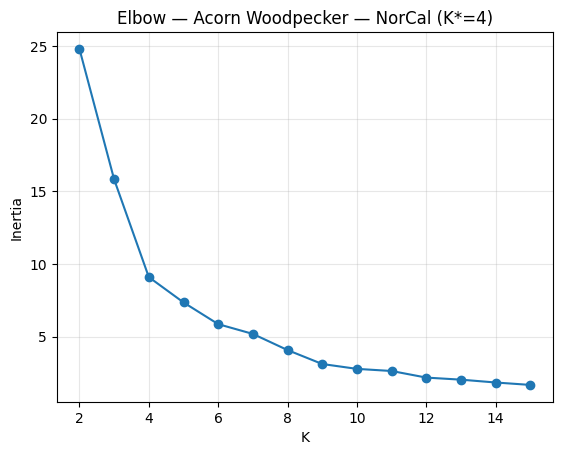

In [25]:
# Elbow plot helper (uses the elbow picker)
def plot_elbow(df_region, species_name, k_min=2, k_max=15, seed=0, region_name=None):
    df_r = clean_sightings(df_region)
    df_r = df_r[df_r["comName"] == species_name].dropna(subset=["lat", "lng"])
    if df_r.empty:
        raise ValueError("No rows for that species in this region.")
    X = df_r[["lat", "lng"]].to_numpy()

    k_star, inertias, ks = pick_k_by_elbow(X, k_min=k_min, k_max=k_max, random_state=seed)
    title_region = region_name or df_region.attrs.get("region", "(region)")

    plt.figure()
    plt.plot(ks, inertias, marker="o")
    plt.title(f"Elbow — {species_name} — {title_region} (K*={k_star})")
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.grid(alpha=0.3)
    plt.show()


df_norcal.attrs["region"] = "NorCal"
plot_elbow(df_norcal, "Acorn Woodpecker", k_min=2, k_max=15, seed=0)

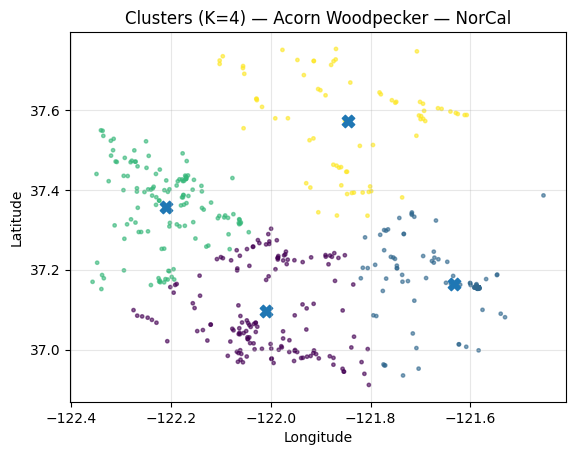

In [ ]:
# Cluster scatter helper
def plot_clusters_with_k(df_region, species_name, k, seed=0, region_name=None):
    df_r = clean_sightings(df_region)
    df_r = df_r[df_r["comName"] == species_name].dropna(subset=["lat", "lng"])
    if df_r.empty:
        raise ValueError("No rows for that species in this region.")
    X = df_r[["lat", "lng"]].to_numpy()

    k = min(k, max(1, len(X) - 1))
    km = KMeans(n_clusters=k, n_init="auto", random_state=seed).fit(X)
    labels = km.labels_
    centers = km.cluster_centers_

    title_region = region_name or df_region.attrs.get("region", "(region)")
    plt.figure()
    plt.scatter(df_r["lng"], df_r["lat"], s=6, alpha=0.6, c=labels)
    plt.scatter(centers[:, 1], centers[:, 0], s=80, marker="X")
    plt.title(f"Clusters (K={k}) — {species_name} — {title_region}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(alpha=0.3)
    plt.show()


K_star = int(hotspots_all.query("species=='Acorn Woodpecker' and region=='NorCal'")["K"].iloc[0])
plot_clusters_with_k(df_norcal, "Acorn Woodpecker", K_star, seed=0)

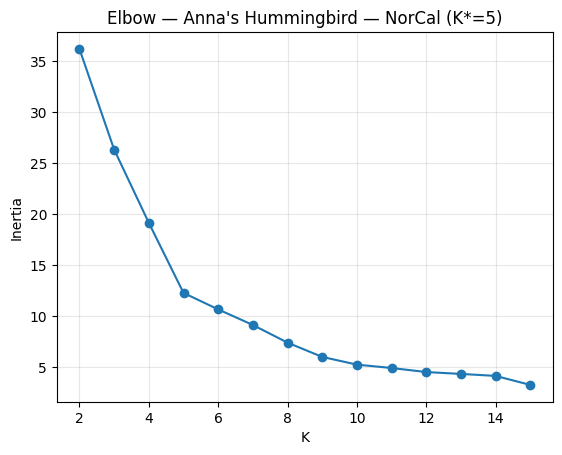

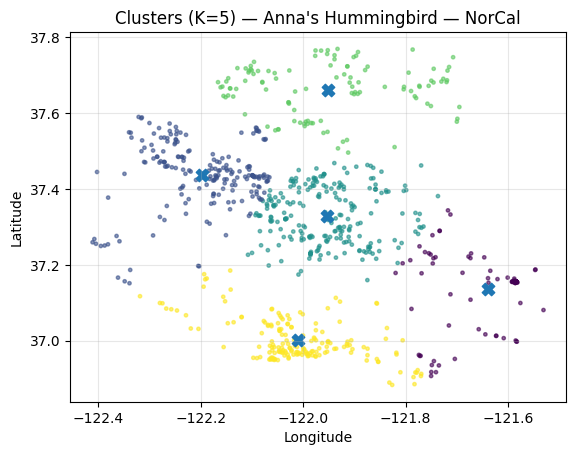

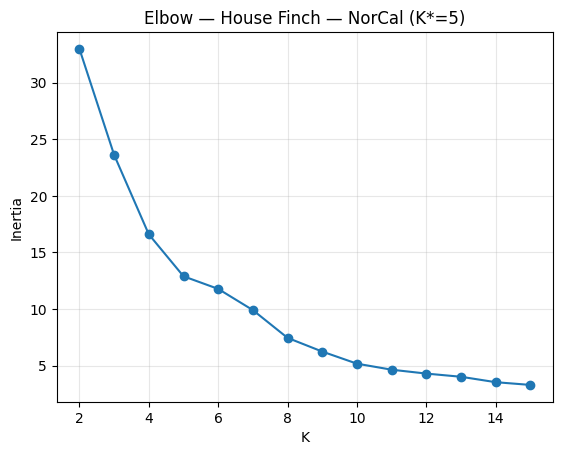

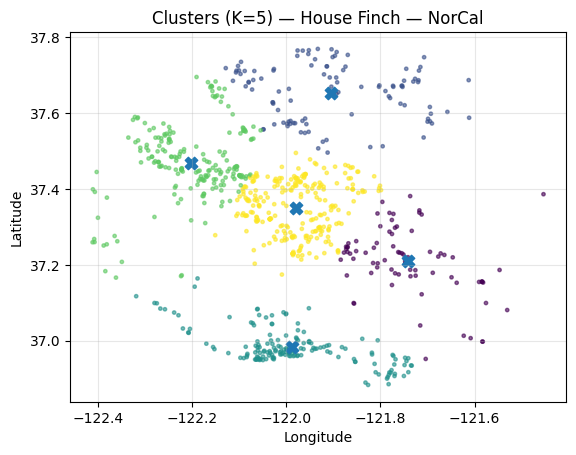

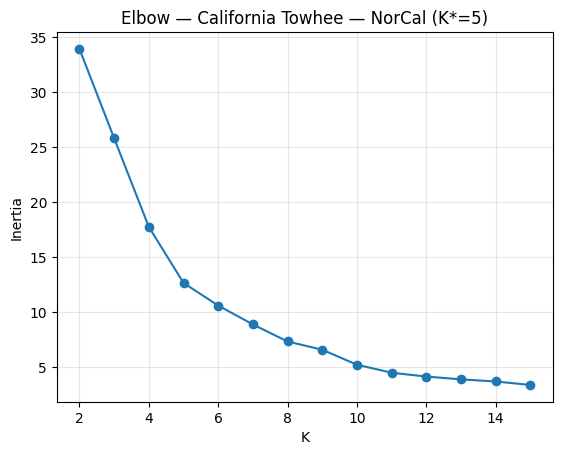

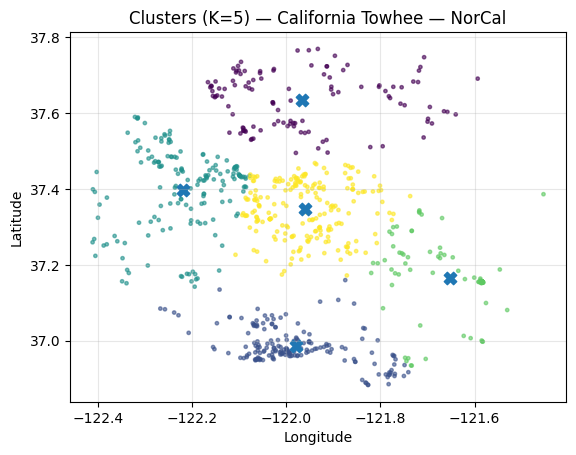

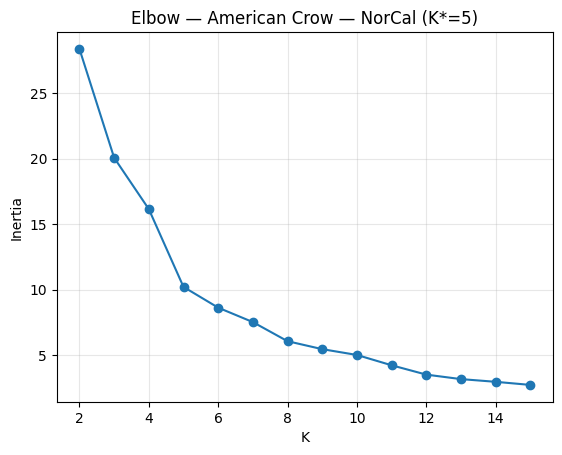

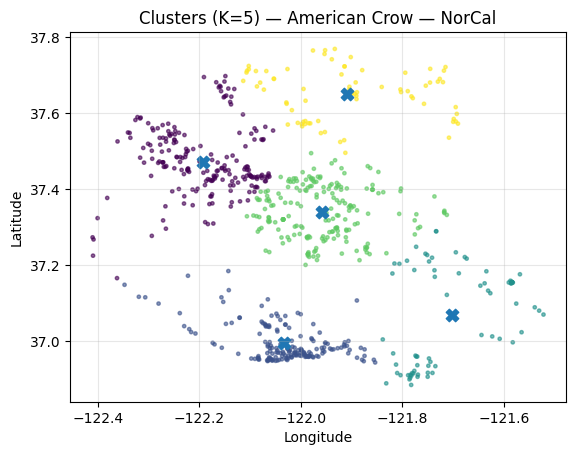

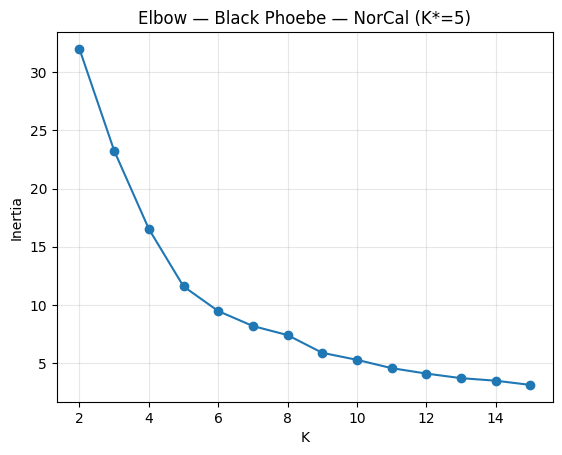

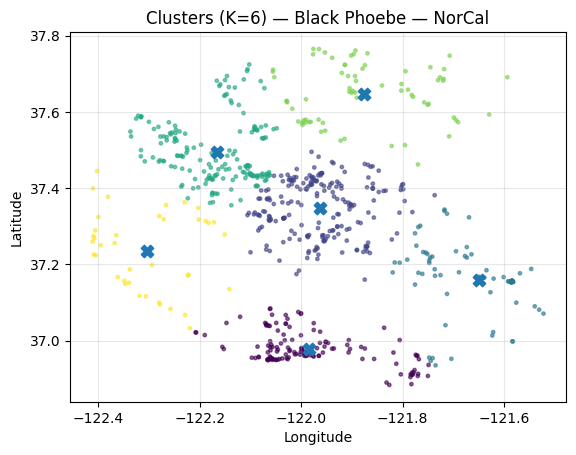

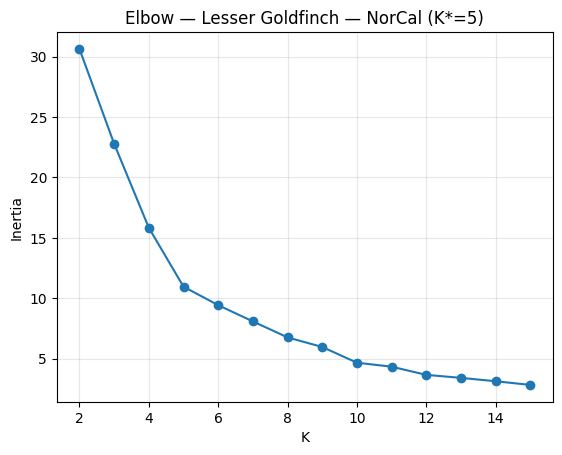

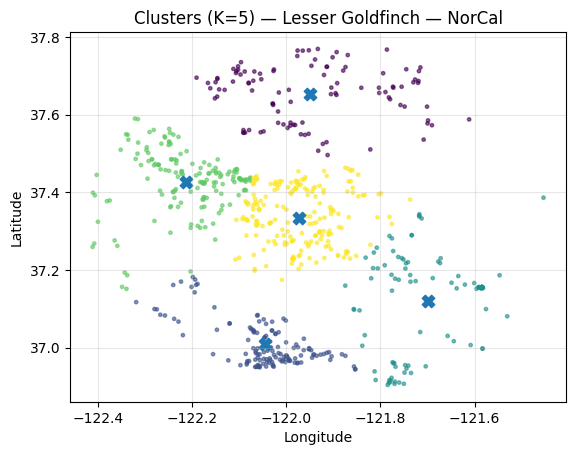

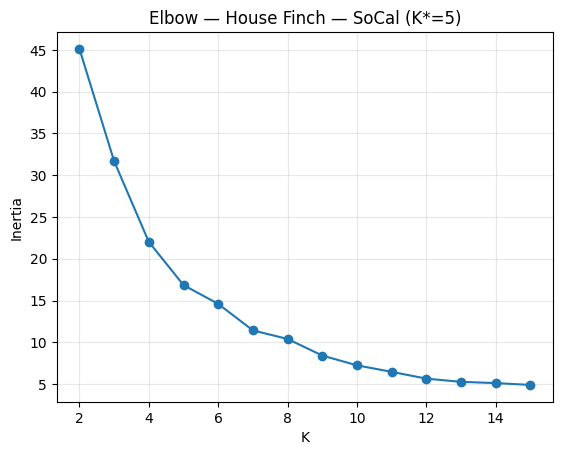

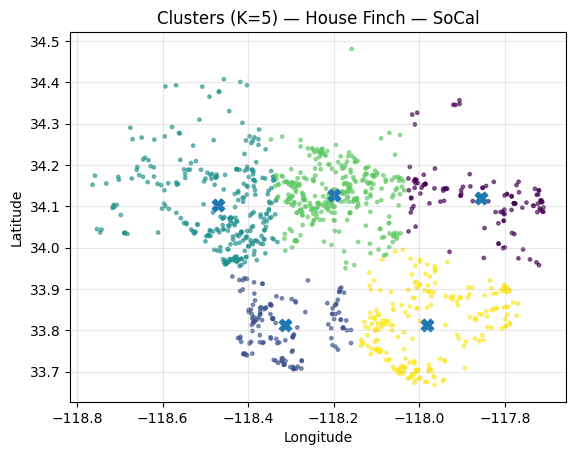

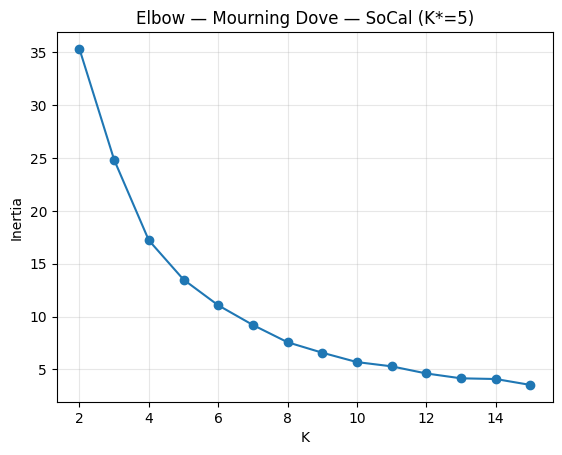

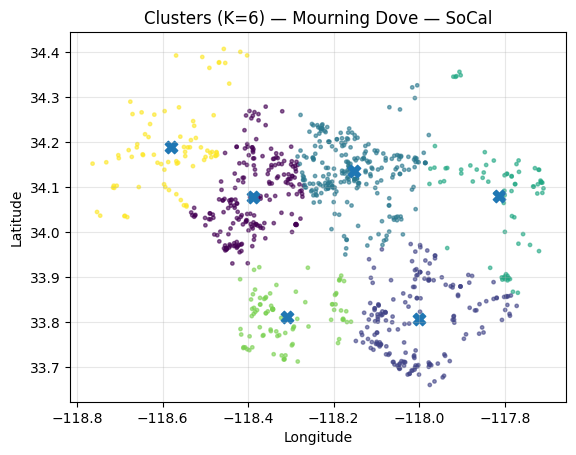

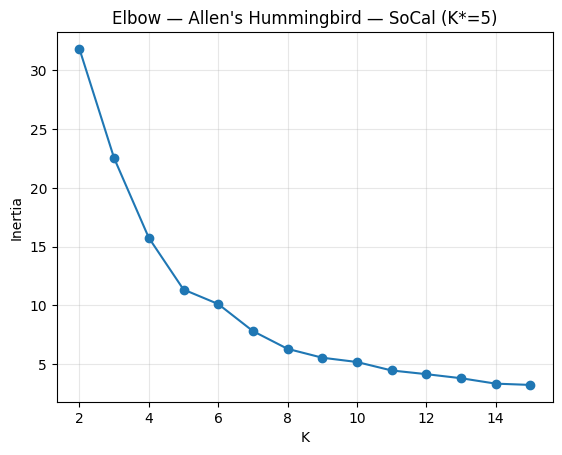

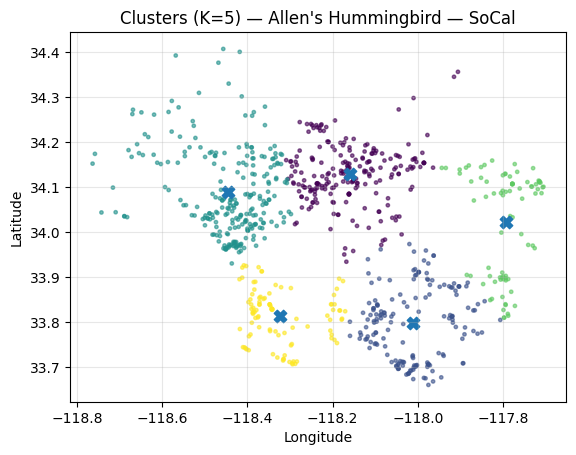

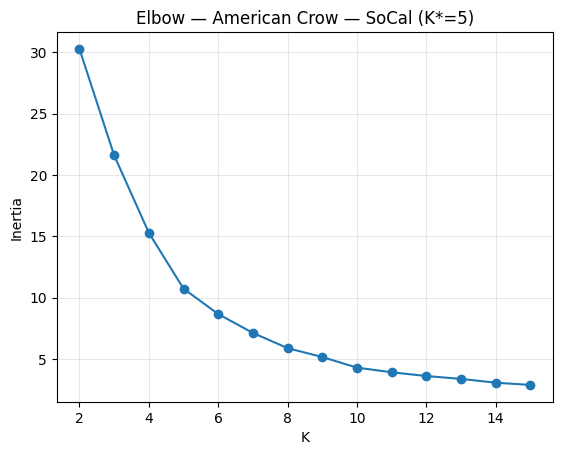

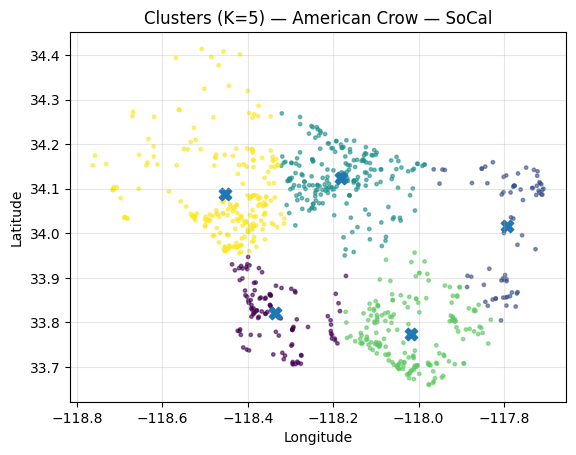

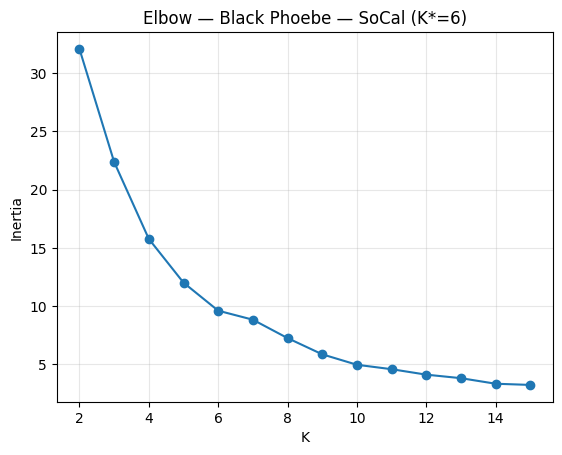

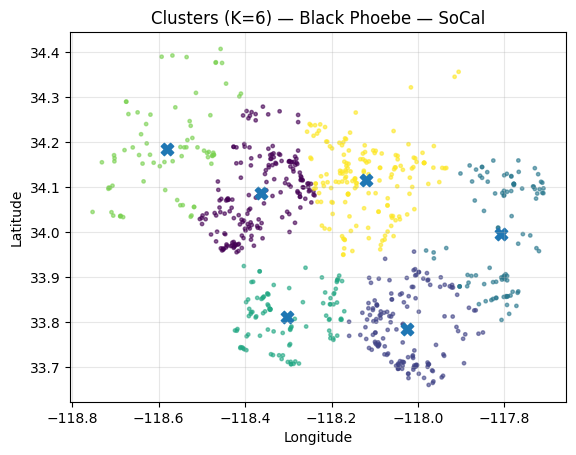

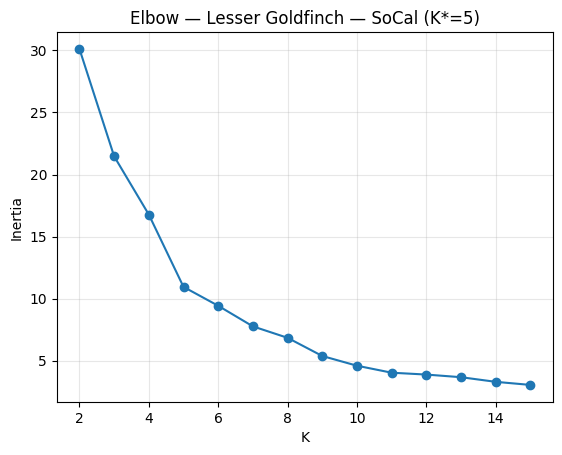

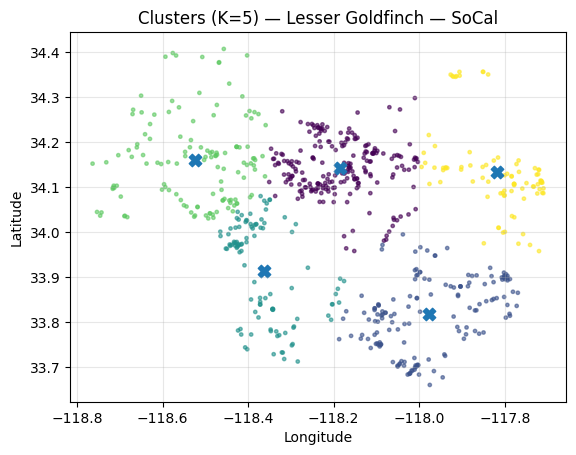

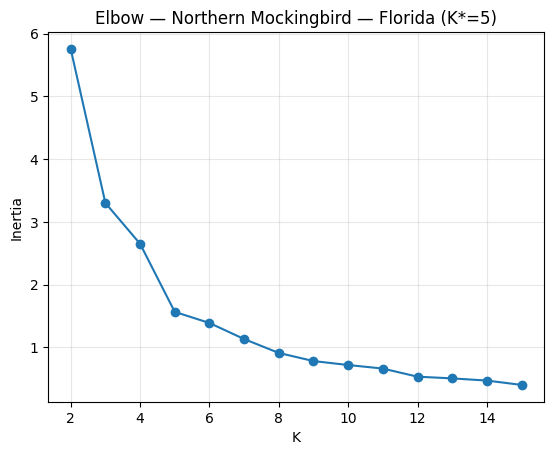

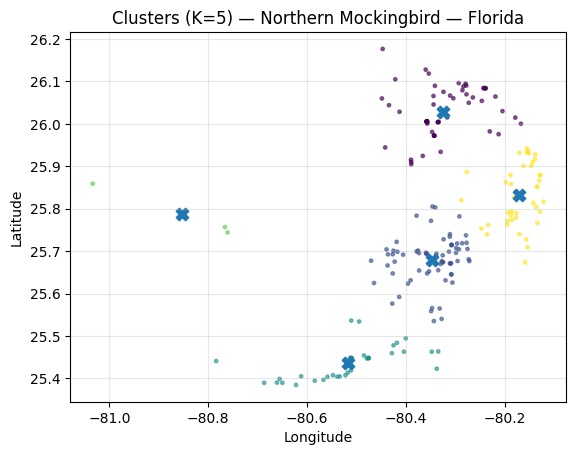

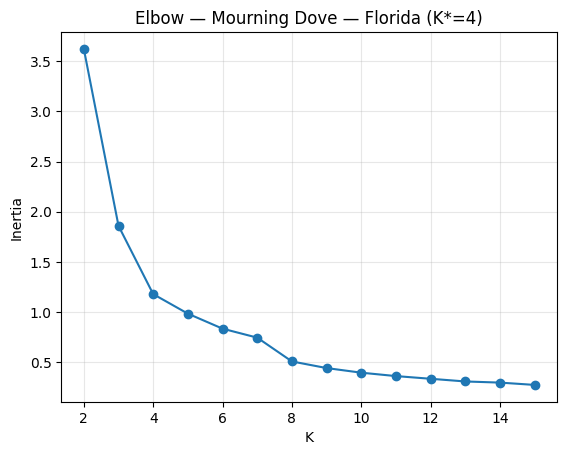

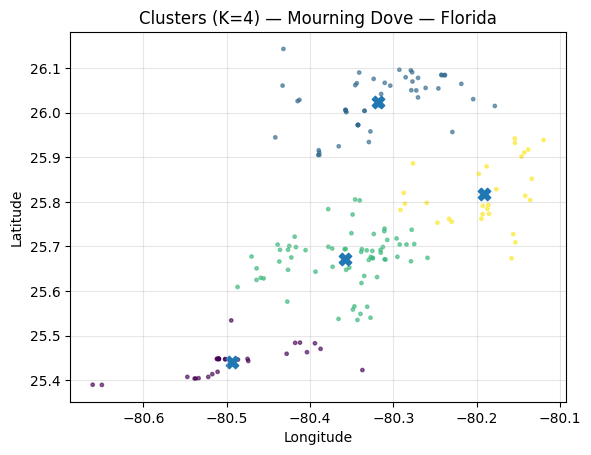

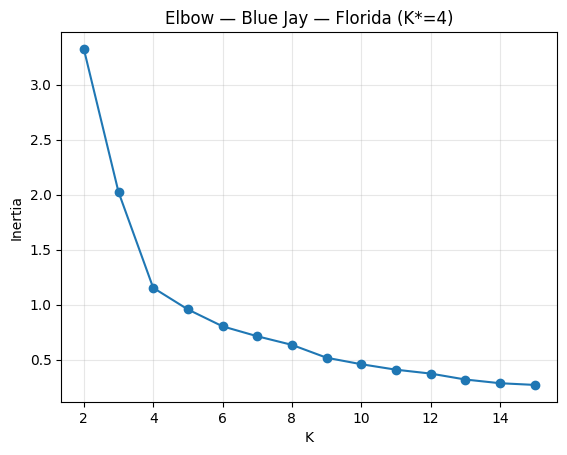

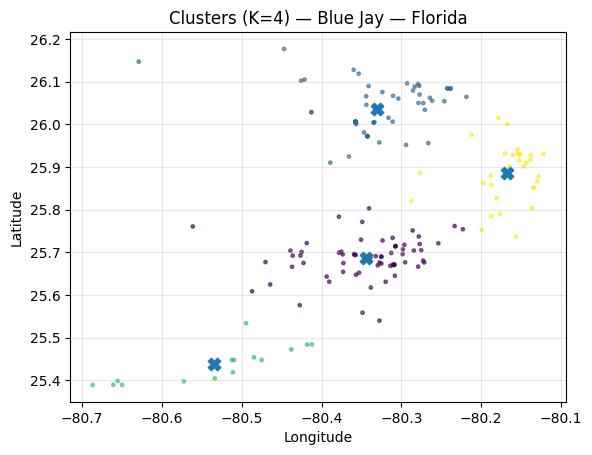

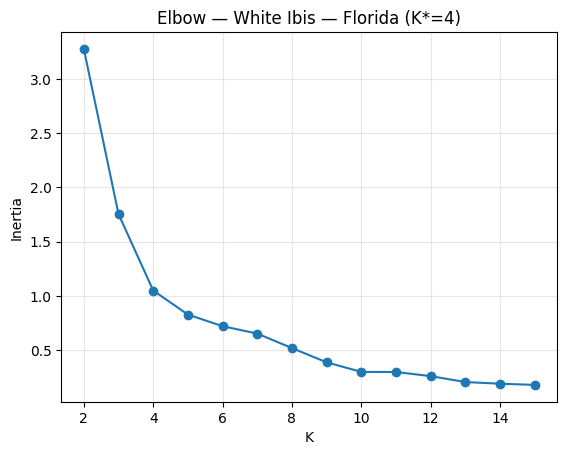

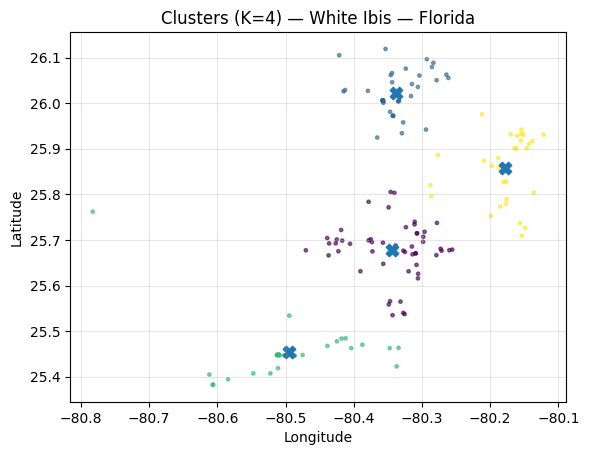

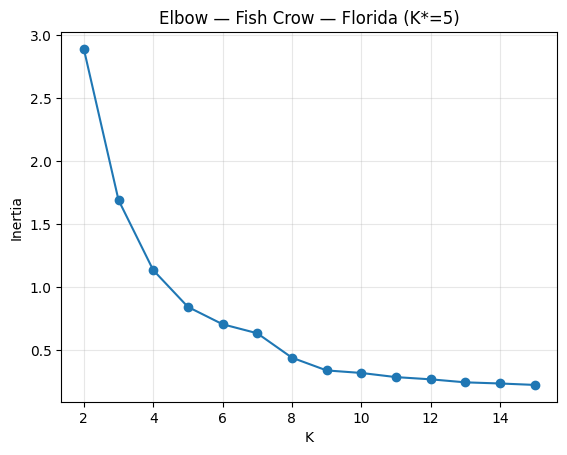

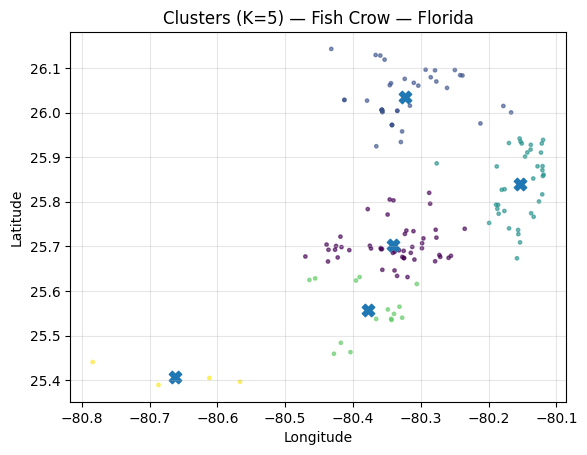

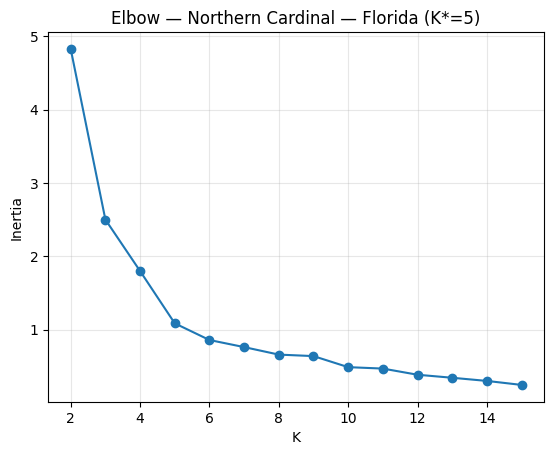

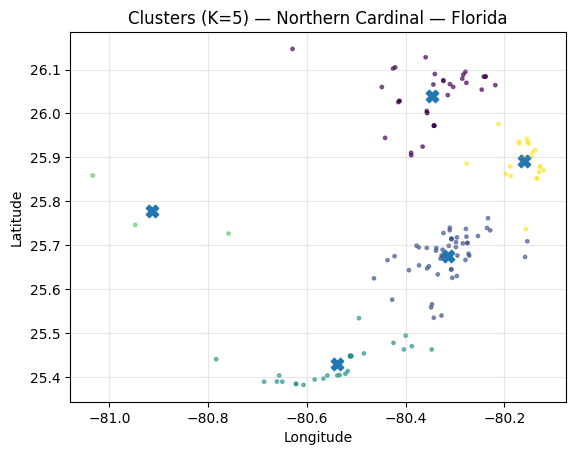

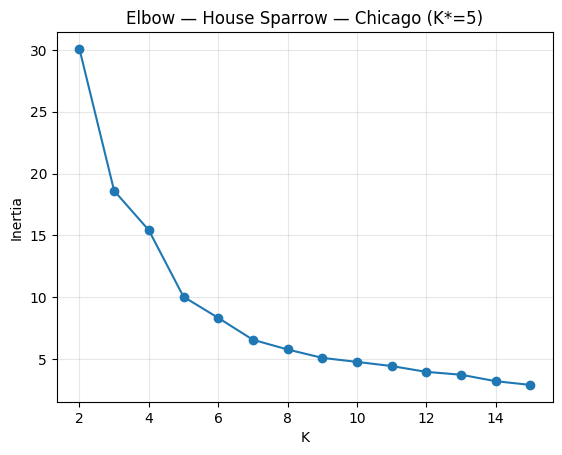

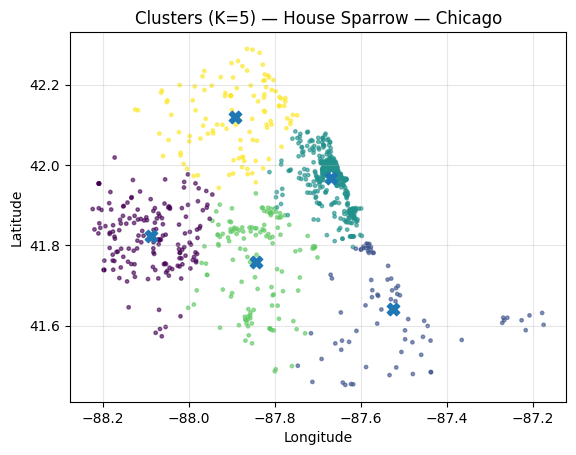

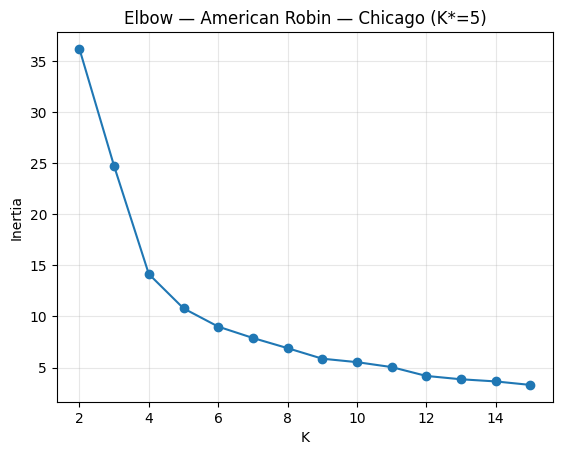

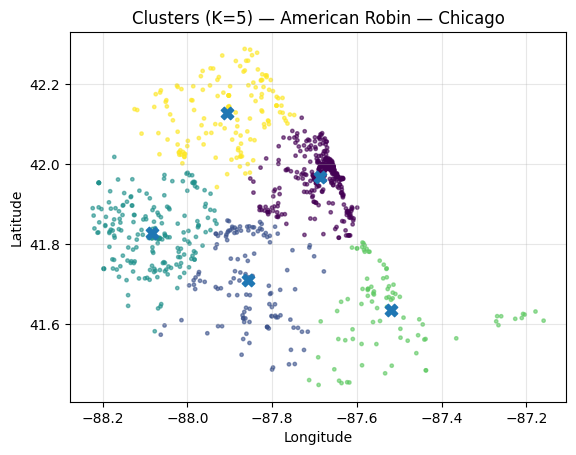

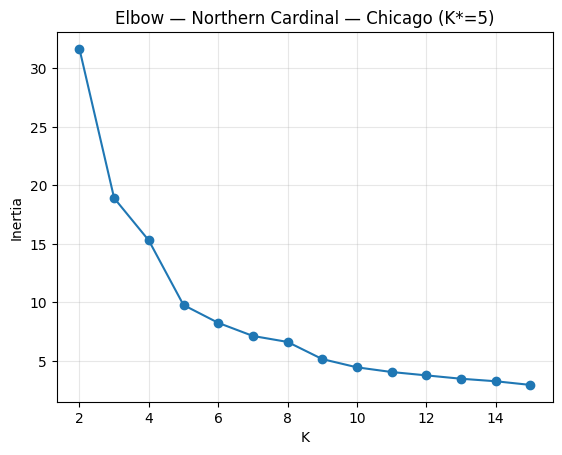

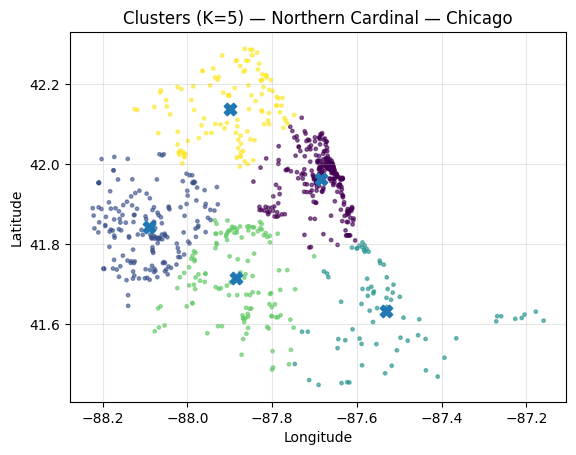

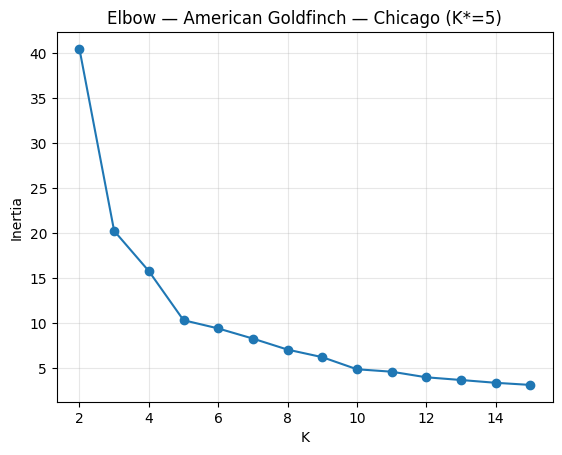

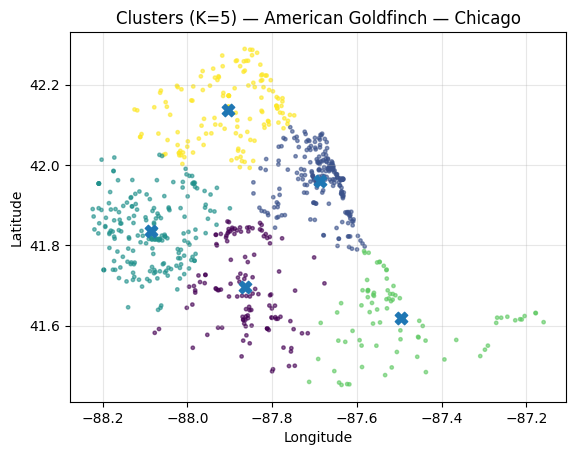

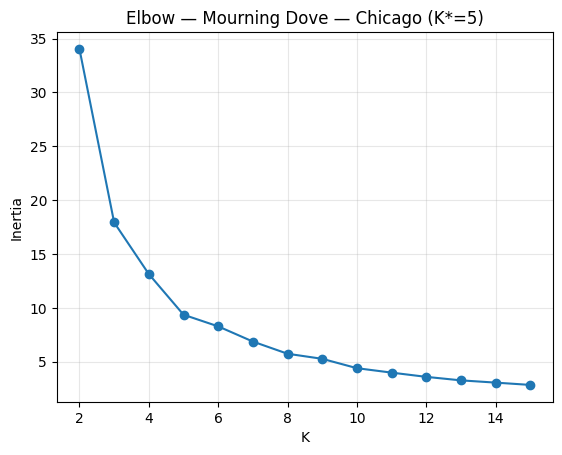

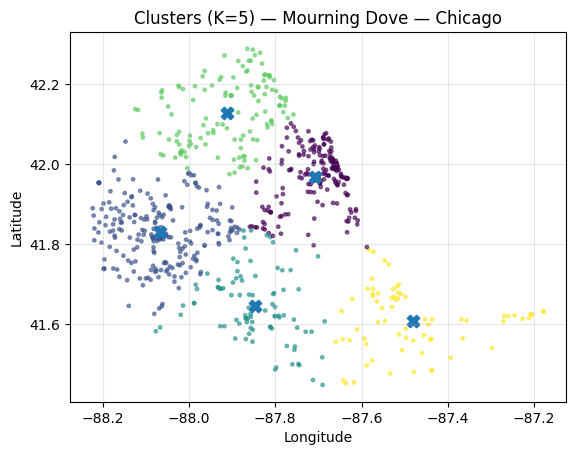

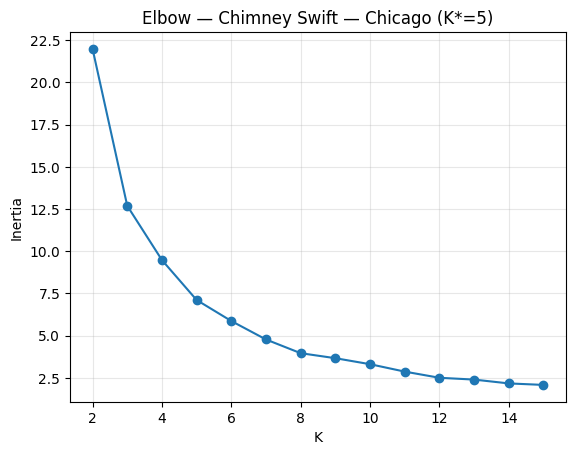

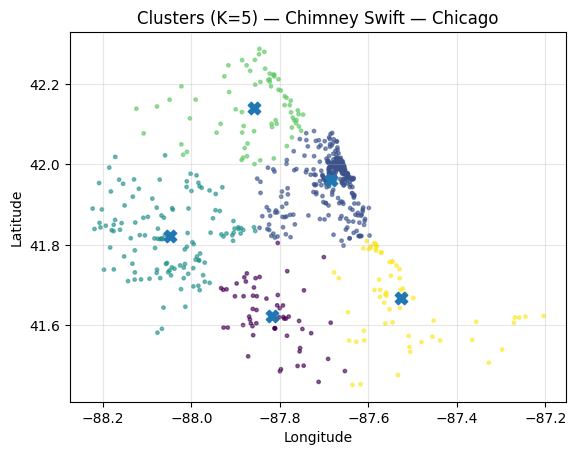

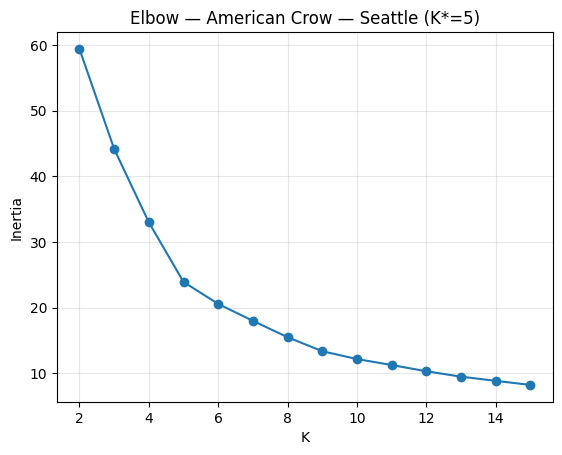

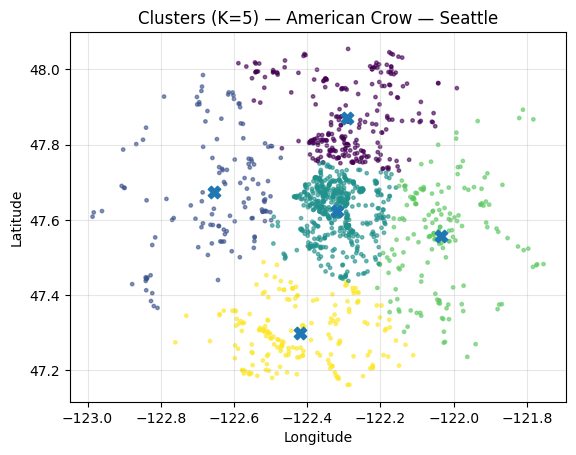

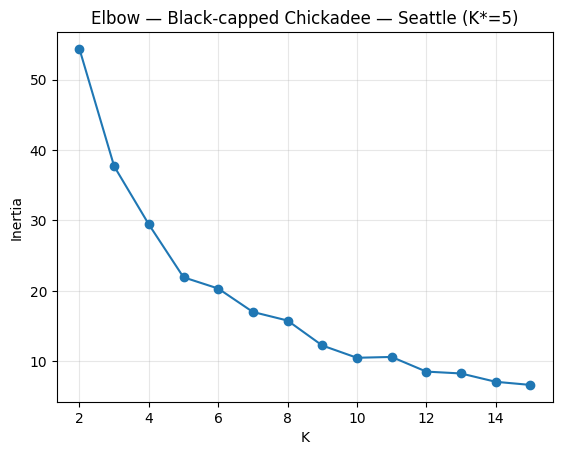

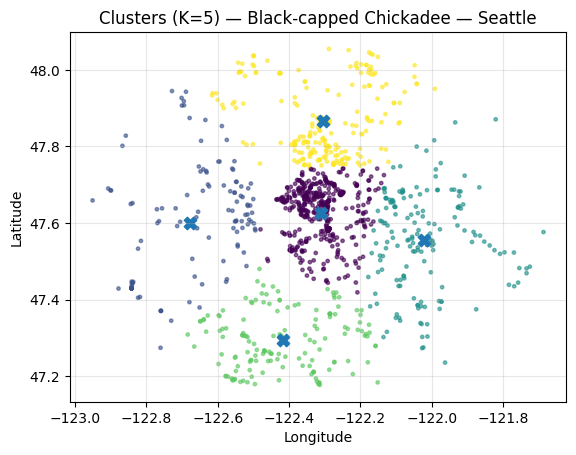

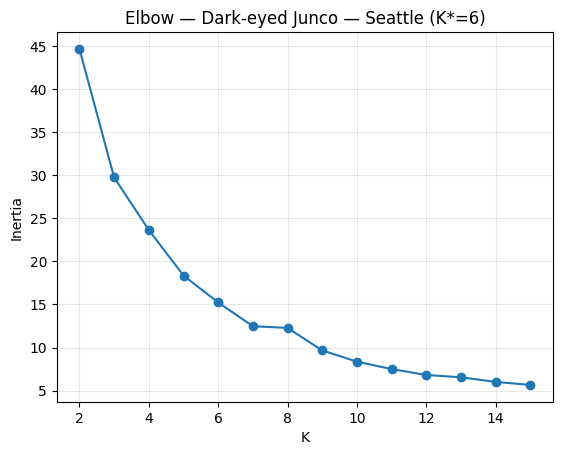

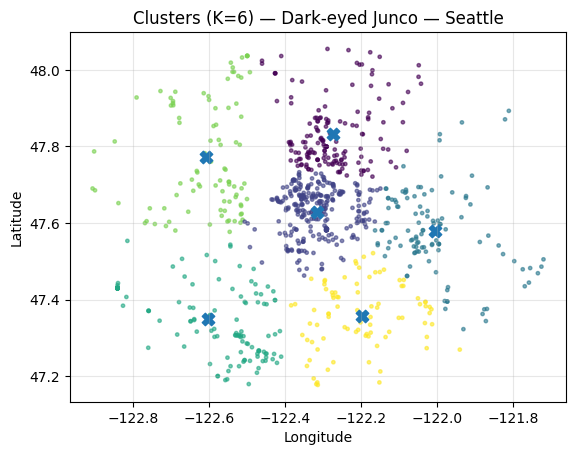

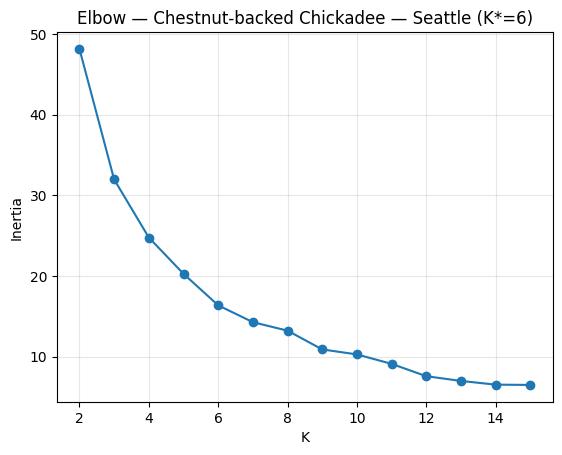

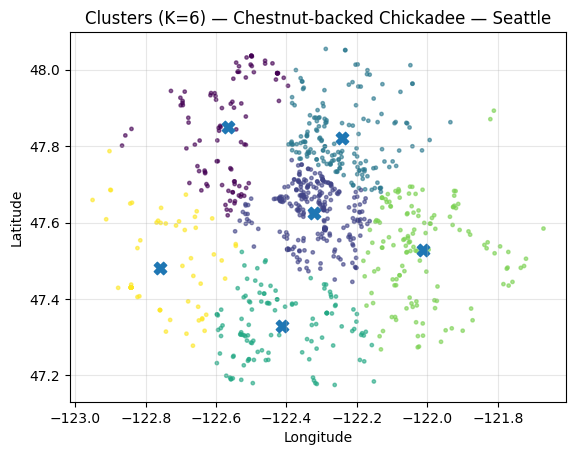

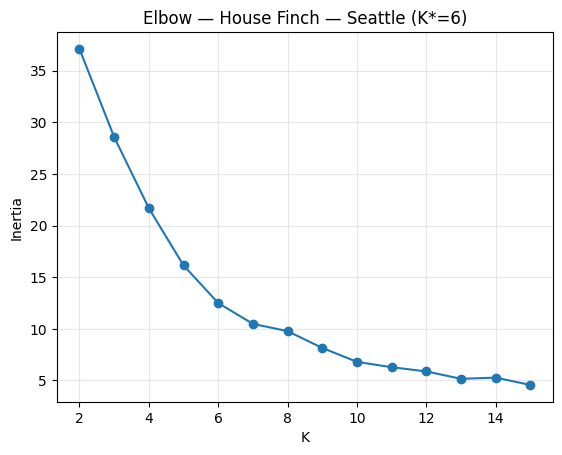

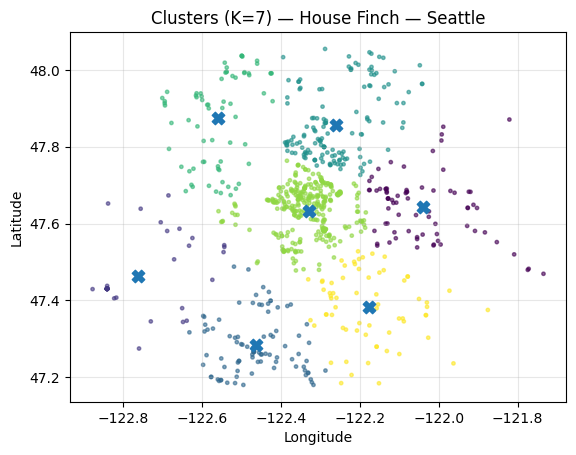

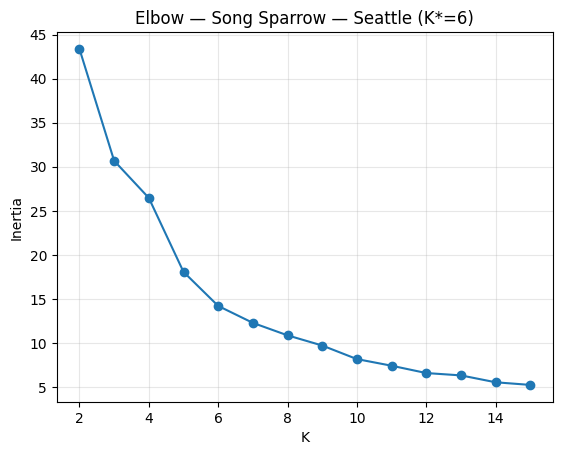

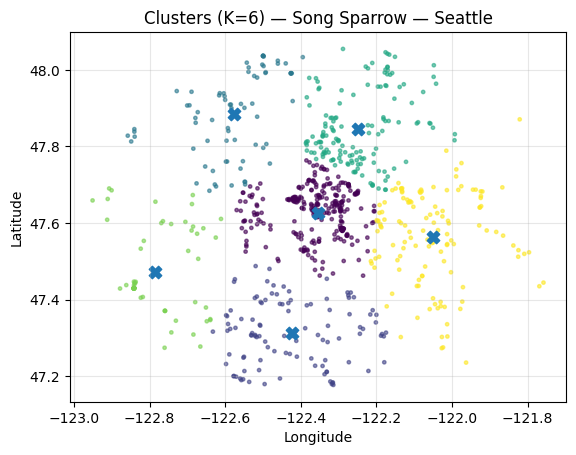

In [ ]:
# Batch plotting for top species per region
def top_species_by_count(df_region, topn=6):
    counts = (
        df_region.groupby("comName")["comName"]
        .count()
        .sort_values(ascending=False)
        .head(topn)
    )
    return counts.index.tolist()

def batch_plot_elbows_and_clusters(regions_dict, hotspots_all, topn=6, k_min=2, k_max=15, seed=0):
    for region_name, dfR in regions_dict.items():
        dfR = clean_sightings(dfR)
        dfR.attrs["region"] = region_name
        species_list = top_species_by_count(dfR, topn=topn)

        for sp in species_list:
            # Elbow using our picker
            plot_elbow(dfR, sp, k_min=k_min, k_max=k_max, seed=seed, region_name=region_name)

            # Use the K chosen by elbow (from hotspots_all with minimum of 6)
            k_star_series = hotspots_all.query("species==@sp and region==@region_name")["K"]
            k_star = int(k_star_series.iloc[0]) if len(k_star_series) else 6

            # Cluster scatter at that K
            plot_clusters_with_k(dfR, sp, k_star, seed=seed, region_name=region_name)


batch_plot_elbows_and_clusters(regions, hotspots_all, topn=6, k_min=2, k_max=15, seed=0)

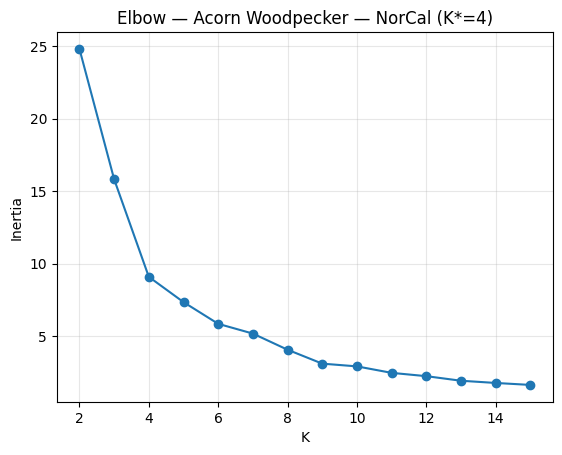

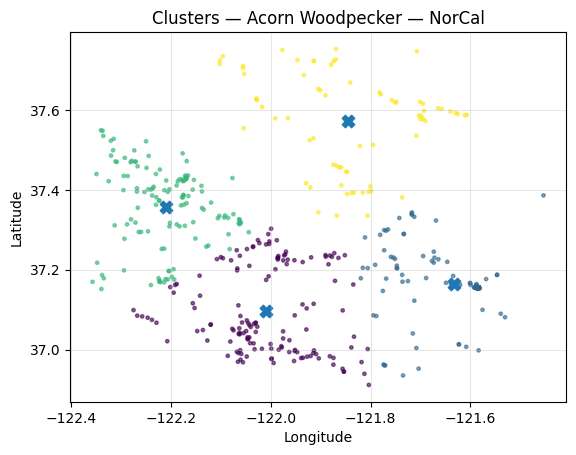

In [28]:
# One-off analysis with plots via the unified function
res = analyze_species_region(
    df_norcal[df_norcal["comName"] == "Acorn Woodpecker"],
    species_name="Acorn Woodpecker",
    region_name="NorCal",
    k_min=2,
    k_max=15,
    outlier_q=0.99,
    make_plots=True,
)